In [ ]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
y, sr = librosa.load('2020 Merc Sound.wav')

In [ ]:
y

In [ ]:
sr

In [ ]:
plt.figure(figsize=(12, 8))

librosa.display.waveplot(y[:500000], sr=sr)


In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(y[:500000])
# plt.plot(y)

#### Load the image

In [26]:
import imageio
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits import mplot3d
import datetime

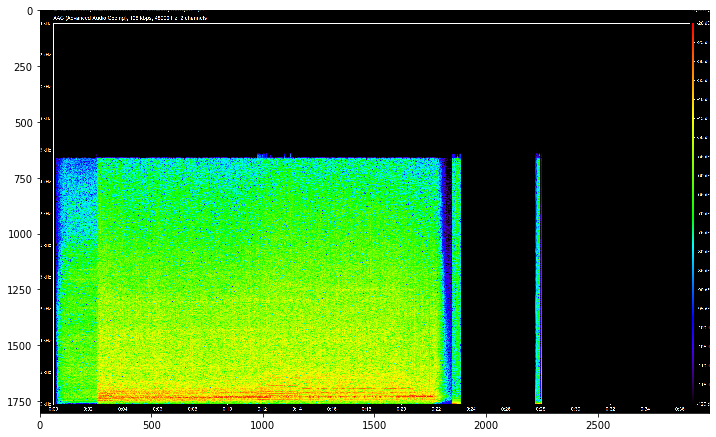

In [8]:
#3000x1803 pixels
image= imageio.imread('2020 Merc Sound.png')
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.show()

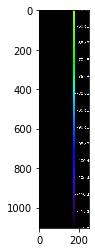

In [10]:
plt.imshow(image[659:1762,2750:,:])

#### Find the color bar

60
1763
60
2909


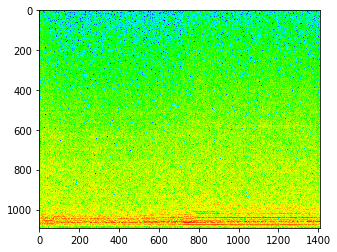

In [16]:
#find the horizontal white lines in the graph to orient myself and find the top and bottom of the color bar
test_elements = [255,255,255]
#look from the top
count = 0
for i in image:
    if np.isin(i, test_elements).any():
        count2 = 0
        for y in i:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(i) >.75:
            origymin = count
            print(origymin)
            break
    count+=1

#look from the bottom
count = len(image)
for j in reversed(image):
    if np.isin(j, test_elements).any():
        count2 = 0
        for y in j:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(j) >.75:
            origymax = count
            print(origymax)
            break
    count-=1
    
#look from the left

tempim = image[659:1762,0:100,:].transpose(1, 0, 2)
count = 0
for x in tempim:
    if np.isin(x, test_elements).any():
        count2 = 0
        for y in x:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(x) > .75:
            origxmin = count
            print(origxmin)
            break

    count+=1

#look from the right
tempim = image[659:1762,2750:,:].transpose(1, 0, 2)
count = 0

for x in tempim:
    if np.isin(x, test_elements).any():
        count2 = 0
        for y in x:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(x) >.75:
            origxmax = count+2750
            print(origxmax)
            break
    count+=1

smallimage = image[670:1762,250:1658,:]
plt.imshow(smallimage)

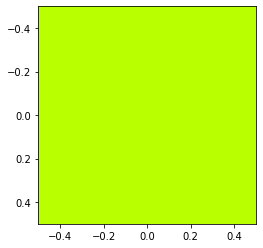

In [5]:
#plot a color from the color bar
plt.imshow([[tuple(image[600,2920])]])

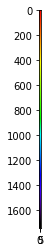

In [3]:
#plot the color bar
colorbar = image[60:1973,2920:2930,:]

plt.imshow(colorbar)

#### find the important part of image

62
63
64
65
66
67
68
69
70
71
72
73


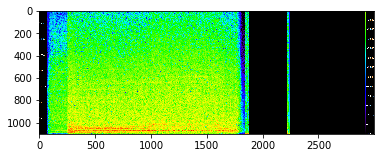

In [125]:
#find where black turns to color on top
test_elements = [0,0,0]
count = 0
count3 = 0
for x in image[600:800]:
    if np.isin(x, test_elements).any():
        count2 = 0
        for y in x:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(x) <.4:
            print(count)
            count3+=1
    count+=1
    if count3 > 10:
        print(count)
        break
        
plt.imshow(image[662:1762])

84
85
86
89
90
91
93
94
95
97
98
99


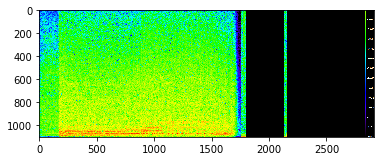

In [43]:
#find where black turns to color on the left
tempim = image[659:1762,0:100,:].transpose(1, 0, 2)
test_elements = [0,0,0]
count = 0
count3 = 0
for x in tempim:
    if np.isin(x, test_elements).any():
        count2 = 0
        for y in x:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(x) <.0020:
            print(count)
            count3+=1
    count+=1
    if count3 > 10:
        print(count)
        break
        
plt.imshow(image[659:1762,84:,:])

1658
1659
1668
1670
1671
1672
1675
1678
1679
1680
1681
1682


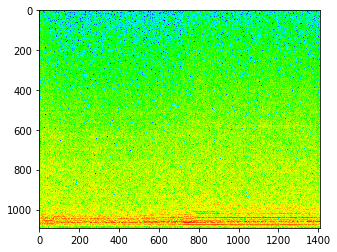

In [4]:
#find where color turns to black on the right side
tempim = image[659:1762,1650:1900,:].transpose(1, 0, 2)
test_elements = [0,0,0]
count = 0
count3 = 0
for x in tempim:
    if np.isin(x, test_elements).any():
        count2 = 0
        for y in x:
            if np.all(y == test_elements):
                count2+=1
        if count2/len(x) >.002:
            print(count+1650)
            count3+=1
    count+=1
    if count3 > 10:
        print(count+1650)
        break
        
smallimage = image[670:1762,250:1658,:]
plt.imshow(smallimage)

#### recode image for 3d plotting

In [5]:
#create a dictionary for every color in the color bar and a value matching the associated dBs
#dB difference from top to bottom of color bar is 60dB
count = -20
dBstep = 60/len(colorbar)

transdic = {}
for color in colorbar:
    transdic[str(color[0])] = count
    count-=dBstep
len(transdic.keys())

988

In [6]:
#convert all rgb codes for equivalent dB
countline = 0
newimage = np.zeros(shape=smallimage.shape[:2])

for line in smallimage:
    countpixel = 0
    for pixel in line:

        if str(pixel) in transdic.keys():
            newzvalue = (transdic[str(pixel)])
            newimage[countline, countpixel] = newzvalue
            
        else:
            newimage[countline, countpixel] = newzvalue
        
        countpixel+=1
    countline+=1
        
newimage.shape

(1092, 1408)

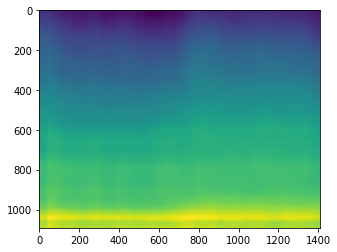

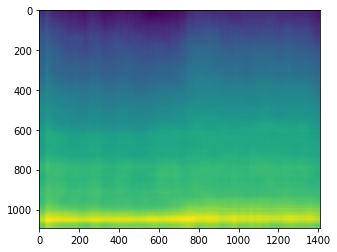

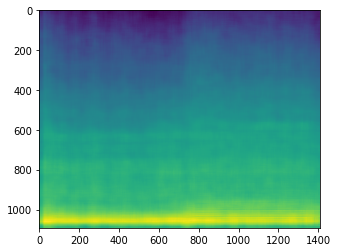

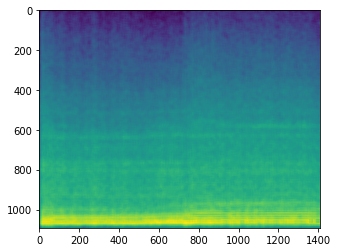

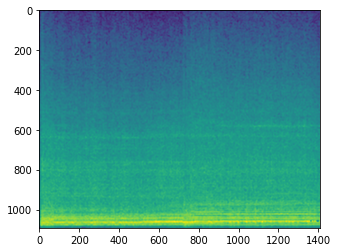

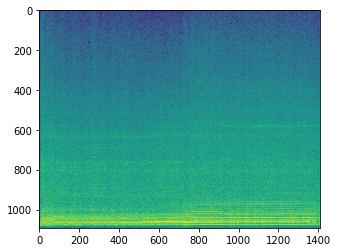

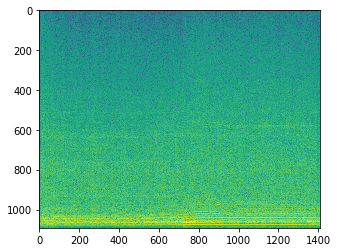

In [22]:
#test smoothing
plt.imshow(ndimage.uniform_filter(newimage, size=80))
plt.show()
plt.imshow(ndimage.uniform_filter(newimage, size=60))
plt.show()
plt.imshow(ndimage.uniform_filter(newimage, size=40))
plt.show()
plt.imshow(ndimage.uniform_filter(newimage, size=20))
plt.show()
plt.imshow(ndimage.uniform_filter(newimage, size=10))
plt.show()
plt.imshow(ndimage.uniform_filter(newimage, size=5))
plt.show()
plt.imshow(ndimage.uniform_filter(newimage, size=1))
plt.show()


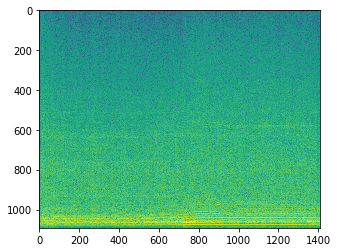

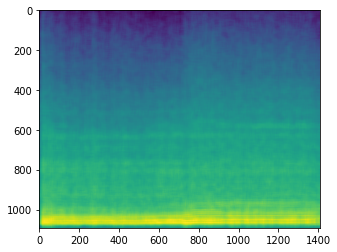

In [23]:
#smooth image
plt.imshow(newimage)
plt.show()
newimage = ndimage.uniform_filter(newimage, size=25)
plt.imshow(newimage)
plt.show()

#### creat 3d plot

In [46]:
#create x and y for plotting
ylen, xlen = newimage.shape

#x is time in seconds original image was 36 seconds long
xmax = xlen/(origxmax-origxmin)*36
x = np.linspace(0,xmax,xlen)


#y is kHz 0-24 kHz for the y axis of the original image
ymax = ylen/(origymax-origymin)*24
y = np.linspace(0,ymax,ylen)

X, Y = np.meshgrid(x, y)

print(len(x), len(y), len(newimage), len(newimage[0]))

1408 1092 1092 1408


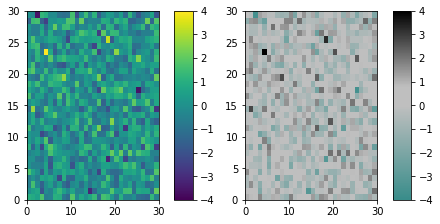

In [20]:
#create a custom colormap for team colors
from matplotlib import cm
viridis = cm.get_cmap('viridis', 256)
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()



cdict = {'red':   [[0.0,  0.22, 0.22],
                   [0.5,  0.75, 0.75],
                   [0.6,  0.75, 0.75],
                   [1.0,  0.0,  0.00]],
         'green': [[0.0,  0.55, 0.55],
                   [0.5,  0.75, 0.75],
                   [0.6,  0.75, 0.75],
                   [1.0,  0.0,  0.00]],
         'blue':  [[0.0,  0.54, 0.54],
                   [0.5,  0.75, 0.75],
                   [0.6,  0.75, 0.75],
                   [1.0,  0.0,  0.00]]}

newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
plot_examples([viridis, newcmp])

<Figure size 432x288 with 0 Axes>

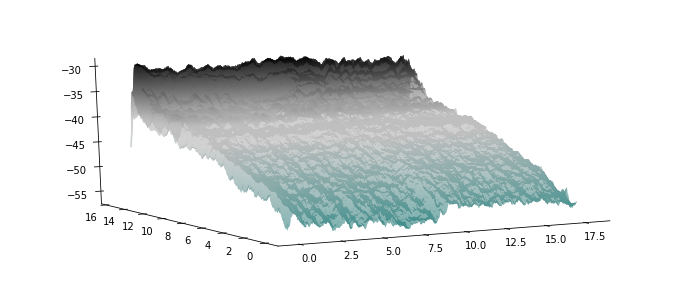

In [49]:
#favorite color and angle
fig = plt.figure()
plt.figure(figsize=(12, 5))
ax = plt.axes(projection='3d')
# ax.axes.set_zlim3d(bottom=0, top=1500) 
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(15, -120)
ax.grid(False)
ax.plot_surface(X, Y, newimage, rstride=1, cstride=1,
                cmap=newcmp, edgecolor='none')

plt.savefig('3dMerc.png', bbox_inches='tight', dpi=400)
plt.show()

# print('ax.azim {}'.format(ax.azim))
# print('ax.elev {}'.format(ax.elev))

#### test plots

<Figure size 432x288 with 0 Axes>

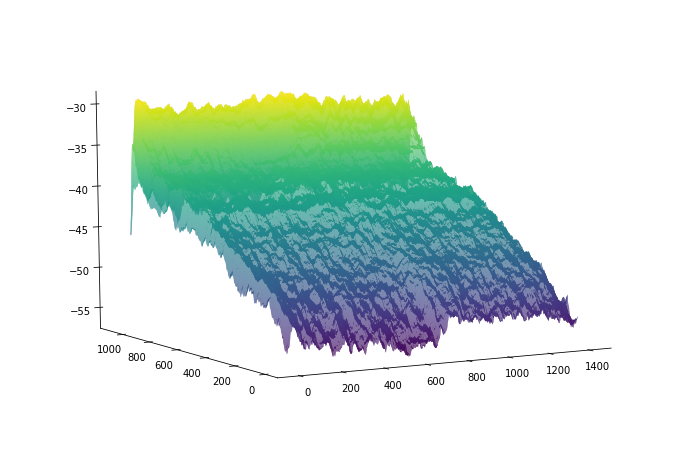

ax.azim -120
ax.elev 10


In [136]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
 
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(10, -120)
ax.grid(False)

ax.plot_surface(X, Y, newimage, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')


plt.show()
print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

<Figure size 432x288 with 0 Axes>

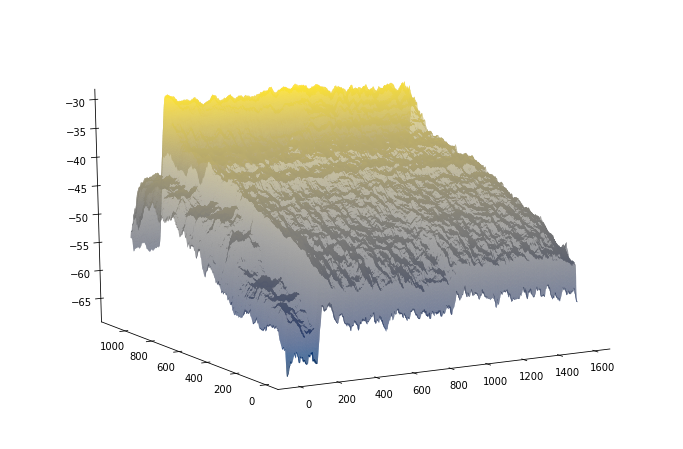

ax.azim -120
ax.elev 15


In [56]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
# ax.axes.set_zlim3d(bottom=0, top=1500) 
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(15, -120)
ax.grid(False)
ax.plot_surface(X, Y, newimage, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')


plt.show()
print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

<Figure size 432x288 with 0 Axes>

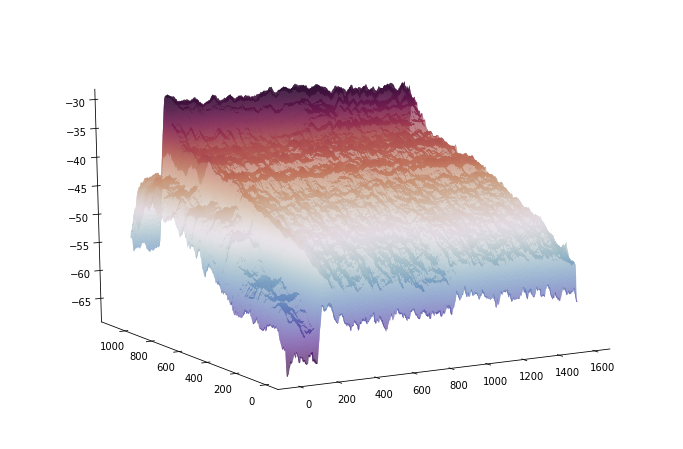

ax.azim -120
ax.elev 15


In [72]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
# ax.axes.set_zlim3d(bottom=0, top=1500) 
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(15, -120)
ax.grid(False)
ax.plot_surface(X, Y, newimage, rstride=1, cstride=1,
                cmap='twilight_shifted', edgecolor='none')


plt.show()
print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

<Figure size 432x288 with 0 Axes>

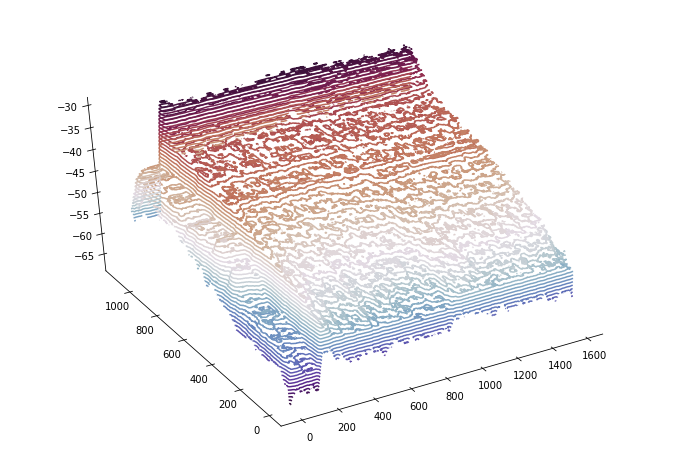

In [67]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(45, -120)
ax.grid(False)
ax.contour3D(X, Y, newimage, 50, cmap='twilight_shifted')


In [51]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

C:\Users\chipu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


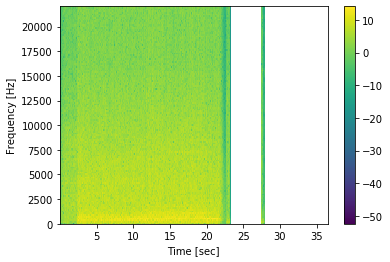

In [55]:
sample_rate, samples = wavfile.read('2020 Merc Sound_mono.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, np.log(spectrogram))
# plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

In [64]:
for s in spectrogram[-20]:
    print(s)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.055346e-08
5.545298e-08
5.5440392e-08
5.5461044e-08
7.296415e-07
2.6149283e-07
2.3262808e-06
1.9319193e-06
7.088045e-06
5.7913703e-06
5.7096686e-06
1.8720693e-06
2.647599e-05
3.3045875e-05
0.006458234
0.0050811833
0.0012770352
0.0023115473
0.0035767183
0.005549678
0.0019354862
0.00050505163
9.166987e-05
0.0037541124
0.0038167662
0.0042647254
0.0015105114
0.0401945
0.0044974415
0.0069164727
0.0024110307
0.01318487
0.023872033
0.0076588914
0.0031660986
0.018312074
0.049976304
0.05101204
0.05822481
0.09741198
0.079226226
0.007433255
0.0031931587
0.0019115234
0.032942433
0.10530495
0.014336035
0.015529942
0.006417796
0.03809858
0.0017967372
0.0452323
0.025736663
0.0033260463
0.047167595
0.03091537
0.102726415
0.011777991
0.29262543
0.09185686
0.37499675
0.01835736
0.5221056
0.29217905
0.02380701
0.15698136
0.021095024
0.14851415
0.3516568
0.089806676
0.13177545
0.026819307
0.073551014
0.050208367
0.1571404
0.45174593
0.12094071
0.020236664
0.17

5.35361
1.1032002
11.2777195
6.6473246
3.230937
4.3400393
2.1563303
7.6106353
13.287654
0.8946669
4.229841
3.0001373
30.371557
1.8818208
29.243727
2.746413
27.98214
1.7158333
8.229503
2.7941787
13.66828
0.3729622
7.4456797
11.939827
2.6969402
2.4438608
4.703218
13.334563
15.847375
6.40904
10.515261
4.0536427
8.655786
11.325563
4.3441324
0.82227
2.798135
5.2544994
0.18262048
6.626258
3.4586124
12.977865
4.797993
8.3627405
2.0695055
26.543085
1.6918608
1.4792613
2.8568447
22.951738
10.279759
8.675703
0.91519123
12.758912
9.32419
0.22702795
15.5578375
6.2444816
9.205796
4.07388
7.7476377
25.155188
7.957282
11.497538
2.4254885
4.774868
0.8652997
1.3270905
0.7429603
0.78591824
1.7845061
1.267199
2.526204
5.8881044
4.9252667
3.4987464
1.439696
1.3847477
13.936158
1.9077377
5.938214
1.07225
1.2550619
12.801133
0.045718182
3.2021008
7.89144
2.031149
0.9779429
4.93755
1.1363888
1.9896151
0.57220936
6.6627407
9.1690855
12.95571
0.95791
1.8676006
1.5463004
2.5605028
11.73048
7.863241
2.7841728
1.

1.8867154
3.680482
10.731671
4.895553
0.29220352
12.571888
17.03622
2.7997086
2.2171478
7.7629595
2.5234313
14.634359
11.346575
0.3667647
7.6303344
0.16672325
1.5077076
30.29954
17.8158
17.666077
24.153004
2.6854165
2.2721326
1.0324043
2.1799996
3.8026772
63.799385
1.4573542
11.690996
2.9116817
7.6524034
7.565031
0.113321215
0.56480426
1.2944123
0.620261
25.38739
0.26763788
6.327868
2.9967756
1.5934355
12.373873
4.013082
48.616486
12.473152
0.6258815
2.0434756
6.335349
2.2735791
85.22617
0.29317024
6.2948794
3.775318
11.814763
13.173823
19.243044
3.6525064
5.262433
2.720576
2.1698701
30.356068
1.2864658
1.3846593
0.50378096
0.006500022
6.29988
2.834746
6.970297
6.5267673
16.559248
0.05965309
3.8719985
9.556326
16.35277
10.353515
2.2650523
14.475017
15.639506
12.547066
4.8212547
8.173946
12.905277
1.5439367
7.3547683
4.035143
3.3011081
8.500422
3.198281
14.368138
0.5944796
14.553598
0.9030557
13.003722
0.42001873
3.5102775
2.3876712
18.953686
4.521318
9.236946
0.016922418
5.493031
3.443

6.3939815
23.225744
6.9283247
5.704244
0.37875378
13.6851225
9.3286495
12.084379
0.055425607
0.7536454
23.071371
5.2979984
10.08657
4.779334
4.9978456
10.92265
1.684577
3.3079133
10.407598
8.845091
29.373428
1.5769341
3.246718
14.361456
0.5856028
0.83293045
16.364258
13.759244
0.1327083
6.1079574
9.327877
0.3579095
1.221496
2.421971
15.871839
16.745724
19.822916
6.0373445
0.666213
6.838636
2.5772214
10.904717
0.5745539
0.103436306
13.597286
81.08627
84.03833
63.622295
50.89223
34.384163
3.4654047
6.0821133
1.8667186
3.1881843
1.941821
11.103773
12.309867
0.71032685
44.950027
0.19419082
1.8354361
5.100469
5.338484
1.8224163
3.652653
12.833961
5.9805126
21.457544
23.85356
2.7617047
0.5268645
23.249556
12.474531
15.894761
9.173692
0.36807266
0.2793767
2.937106
50.762157
3.012997
2.9862616
16.30501
6.501282
22.773312
5.5636244
0.59248006
2.5370653
1.0440295
20.645342
2.5853965
2.4497557
7.084951
42.331318
20.714647
9.299132
19.493937
41.5682
7.0051727
2.3628044
1.2449899
5.0588093
10.75162

11.766967
3.8118823
0.88626355
2.781035
20.20238
0.61939543
1.6398151
1.041436
0.33625004
2.8618202
1.5762892
6.6815567
1.262929
6.637562
1.8190559
8.693531
2.179223
18.11454
10.4895115
7.0469327
0.07379811
2.0743299
2.9943206
6.197557
5.602036
1.0540417
20.51533
0.9099873
6.3496013
3.5403366
2.1089182
16.818558
5.001343
6.987428
6.721828
14.672264
0.8956089
12.344173
4.749087
1.4679571
2.161881
0.22587281
2.49677
0.1134752
5.5477057
17.509176
6.4640746
8.053161
25.371944
1.5412289
9.669291
5.100099
10.394859
0.6657688
15.252871
7.399735
10.141582
4.564723
2.381519
0.28798437
0.05595654
4.258029
1.8782936
3.6015275
6.588145
4.67791
7.706738
2.3733456
1.655024
2.0276554
1.78031
9.946906
0.70886964
3.2360795
0.1838568
1.8695749
1.5951595
0.062077288
0.120066956
2.0251207
0.27428293
0.46850088
1.5237035
0.8772271
0.1676211
0.18319632
6.3725033
1.4657253
6.8897157
0.7804412
7.4934173
0.15328011
0.15609801
2.6867244
4.701154
2.906008
0.08446539
0.41172856
1.2528975
1.7666922
0.75657755
1.18

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
